In [1]:
# Importamos librerias.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("./data_processed/X_train.csv", index_col=None, encoding='utf-8')
y_train = pd.read_csv("./data_processed/y_train.csv", index_col=None, encoding='utf-8')

X_test = pd.read_csv("./data_processed/X_test.csv", index_col=None, encoding='utf-8')
y_test = pd.read_csv("./data_processed/y_test.csv", index_col=None, encoding='utf-8')

print('Datos de entrenamiento:')
print(X_train.shape)
print(y_train.shape)
print('Datos de prueba:')
print(X_test.shape)
print(y_test.shape)

Datos de entrenamiento:
(5482, 6358)
(5482, 1)
Datos de prueba:
(1371, 6358)
(1371, 1)


In [3]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6348,6349,6350,6351,6352,6353,6354,Negatives,Neutrals,Positives
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115,0.885,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355,0.645,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0


In [4]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6348,6349,6350,6351,6352,6353,6354,Negatives,Neutrals,Positives
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.274752,0.047,0.953,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,1.000,0.0


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a7aaa7910>
Traceback (most recent call last):
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

0.7982488143013499


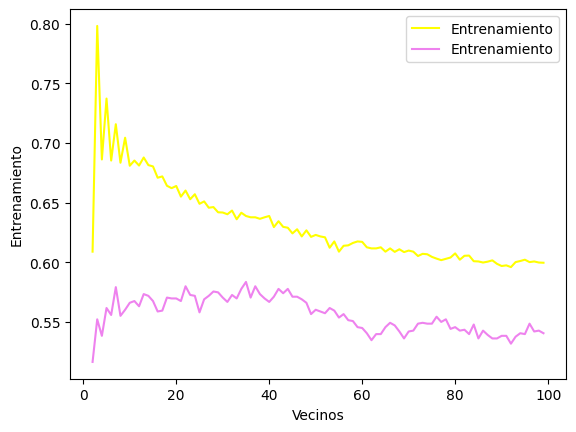

In [5]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Buscando el numero de K (vecinos) optimo. 
vecinos = np.arange(2,100)
train_acuracy = np.empty(len(vecinos))
test_acuracy = np.empty(len(vecinos))
for i, k in enumerate(vecinos):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_acuracy[i] =knn.score(X_train, y_train)
  test_acuracy[i] =knn.score(X_test, y_test)

df_fit = pd.DataFrame()
df_fit['Vecinos'] = vecinos
df_fit['Entrenamiento'] = train_acuracy
df_fit['Prueba'] = test_acuracy

sns.lineplot(x="Vecinos", y="Entrenamiento", data=df_fit, color='yellow', label='Entrenamiento')
sns.lineplot(x="Vecinos", y="Prueba", data=df_fit, color='violet', label='Entrenamiento')

df_fit.to_csv('./data_processed/vecinos.csv', encoding='utf-8')

print(max(train_acuracy))

In [7]:
# Se escoge el numero de vecinos más optimo  == 7
from sklearn.metrics import accuracy_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

# Calcular la exactitud
exactitud = round(accuracy_score(y_test, predictions),2)
print("Exactitud:", exactitud)

# Calcular la preci sión
precision = round(precision_score(y_test, predictions),2)
print("Precisión:", precision)

# Calcular la puntuación F1
f1 = round(f1_score(y_test, predictions),2)
print("Puntuación F1:", f1)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8a7aaa79a0>
Traceback (most recent call last):
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bruno-rg/anaconda3/envs/nlp/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Exactitud: 0.58
Precisión: 0.6
Puntuación F1: 0.53
